In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from island_model import WorldModel, Island, IslandCell

In [3]:
model = WorldModel(n_islands=12, land_fraction=0.15)

Could not find path between Welds and Bungton
Could not find path between Welds and Eye
Could not find path between Mitch and Bungton
Could not find path between Mitch and Eye
Could not find path between Ashorthals and Bungton
Could not find path between Ashorthals and Eye
Could not find path between Crand and Bungton
Could not find path between Crand and Eye
Could not find path between Meley and Bungton
Could not find path between Meley and Eye
Could not find path between Norquay and Bungton
Could not find path between Norquay and Eye
Could not find path between Waterneston and Bungton
Could not find path between Waterneston and Eye
Could not find path between Hareham and Bungton
Could not find path between Hareham and Eye
Could not find path between Brinny Read and Bungton
Could not find path between Brinny Read and Eye
Could not find path between Bungton and Welds
Could not find path between Bungton and Mitch
Could not find path between Bungton and Ashorthals
Could not find path bet

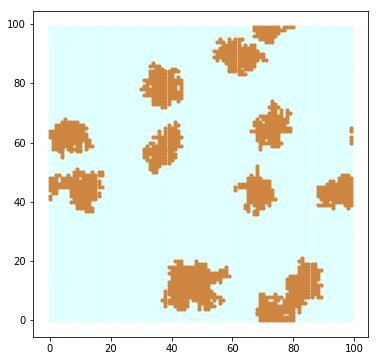

In [4]:
sea_coords = []
land_coords = []
port_coords = []
for contents, x, y in model.grid.coord_iter():
    if contents["Land"] is None:
        sea_coords.append((x, y))
    else:
        land_coords.append((x, y))
        if len(contents["Ships"]) > 0:
            port_coords.append((x, y))

fig, ax = plt.subplots(figsize=(6,6))

ax.scatter(*zip(*sea_coords), s=10, c='LightCyan')
ax.scatter(*zip(*land_coords), s=10, c='Peru')
#ax.scatter(*zip(*port_coords), s=12, c='Black')

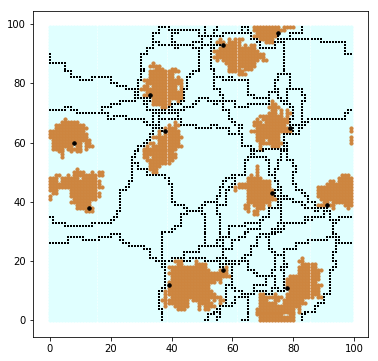

In [5]:
fig, ax = plt.subplots(figsize=(6,6))

ax.scatter(*zip(*sea_coords), s=10, c='LightCyan')
ax.scatter(*zip(*land_coords), s=10, c='Peru')
ax.scatter(*zip(*port_coords), s=12, c='Black')

for path in model.sea_lanes.values():
    ax.scatter(*zip(*path), s=5, marker="+", c='k')

Run for some amount of time, then collect temperature and humidity information

In [6]:
for t in range(100):
    model.step()

0: The Rottlesternablebdebrandon departed Ashorthals for Welds
0: The Failin departed Meley for Ashorthals
0: The Mel departed Mitch for Crand
0: The Luiscah departed Mitch for Milshfieldon
0: The Crouth departed Brinny Read for Waterneston
0: The Madisondale departed Mitch for Waterneston
0: The Kirkeat Dury departed Meley for Norquay
0: The Wen departed Waterneston for Crand
0: The Savin departed Meley for Ashorthals
0: The Ashly departed Milshfieldon for Mitch
0: The Bar departed Brinny Read for Mitch
0: The Mareth departed Ashorthals for Crand
0: The Morry departed Norquay for Mitch
1: The Oxford departed Mitch for Norquay
1: The Ken departed Ashorthals for Brinny Read
1: The Paydenca departed Welds for Brinny Read
1: The Kinslinston departed Ashorthals for Welds
1: The Emian departed Welds for Waterneston
1: The Toth Stroull departed Brinny Read for Hareham
1: The Kin-by departed Meley for Waterneston
1: The Alin departed Meley for Hareham
1: The Kade departed Crand for Welds
1: T

89: The Sope arrived at Ashorthals.
89: The Bury departed Milshfieldon for Meley
90: The Fazion arrived at Milshfieldon.
90: The Shillist Isle arrived at Welds.
91: The Rottlesternablebdebrandon arrived at Welds.
91: The Ham departed Brinny Read for Ashorthals
91: The Robely departed Crand for Meley
91: The Shillist Isle departed Welds for Brinny Read
92: The Kinslinston arrived at Welds.
93: The Maytondo arrived at Hareham.
93: The Brigntwhalham arrived at Mitch.
93: The Sope departed Ashorthals for Hareham
94: The Pethary arrived at Hareham.
94: The Autumn arrived at Welds.
95: The Rottlesternablebdebrandon departed Welds for Crand
95: The Cailysonovan departed Ashorthals for Brinny Read
95: The Pethary departed Hareham for Waterneston
97: The Toth Stroull arrived at Norquay.
97: The Maytondo departed Hareham for Meley
97: The Kinslinston departed Welds for Ashorthals
98: The Fazion departed Milshfieldon for Mitch
98: The Paydenca arrived at Brinny Read.
99: The Brigntwhalham departe

In [7]:
ship = model.schedule.agents[1]
ship.name

'The Sar'

In [8]:
for entry in ship.log:
    print(entry)

Day 0
	At port at Waterneston

Day 1
	At port at Waterneston

Day 2
	At port at Waterneston

Day 3
	At port at Waterneston

Day 4
	At port at Waterneston

Day 5
	At port at Waterneston

The Sar departed Waterneston for Brinny Read
Day 6
	Wind: -1.30 by -0.31
	 Temperature: 0.7

Day 7
	Wind: -1.17 by -0.42
	 Temperature: 0.7

Day 8
	Wind: -1.28 by -0.33
	 Temperature: 0.7

Day 9
	Wind: -1.58 by 0.19
	 Temperature: 0.7

Day 10
	Cloudy
	Wind: -1.28 by -0.36
	 Temperature: 0.7

Day 11
	Cloudy
	Wind: -0.91 by -0.61
	 Temperature: 0.7

Day 12
	Cloudy
	Wind: -0.84 by -0.65
	 Temperature: 0.7

Day 13
	Cloudy
	Wind: 0.25 by -0.31
	 Temperature: 0.7

Day 14
	Raining
	Wind: 0.37 by -0.16
	 Temperature: 0.7

Day 15
	Cloudy
	Wind: 0.46 by 0.02
	 Temperature: 0.7

Day 16
	Cloudy
	Wind: -0.25 by -0.62
	 Temperature: 0.7

Day 17
	Cloudy
	Wind: -0.59 by -0.62
	 Temperature: 0.7

Day 18
	Cloudy
	Wind: -1.11 by -0.34
	 Temperature: 0.7

Day 19
	Cloudy
	Wind: -1.03 by -0.39
	 Temperature: 0.7

Day 20
	Win

## Weather analysis

In [9]:
temp_map = np.zeros((100, 100))
humidity_map = np.zeros_like(temp_map)
cloud_map = np.zeros_like(temp_map)
rain_map = np.zeros_like(temp_map)

for x in range(100):
    for y in range(100):
        cell = model.grid[x][y]["Weather"]
        temp_map[x,y] = cell.temperature
        humidity_map[x,y] = cell.humidity
        if cell.cloudy:
            cloud_map[x,y] = 1
        if cell.raining:
            rain_map[x,y] = 1

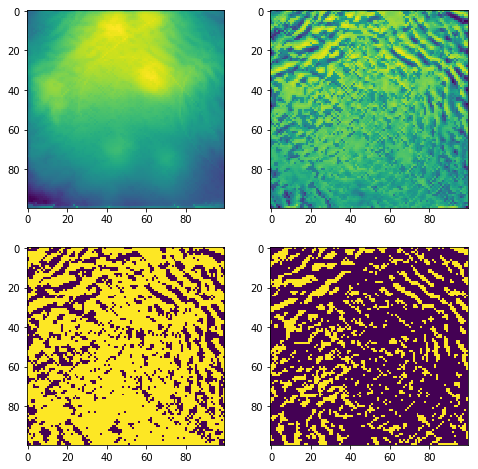

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(8,8))
axes[0,0].imshow(temp_map)
axes[0,1].imshow(humidity_map)
axes[1,0].imshow(cloud_map)
axes[1,1].imshow(rain_map)

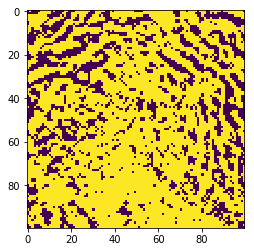

In [11]:
notional_clouds = np.zeros_like(humidity_map)
for x in range(100):
    for y in range(100):
        cell = model.grid[x][y]["Weather"]
        if cell.humidity > 0.6 + 0.3*cell.temperature:
            notional_clouds[x,y] = 1
plt.imshow(notional_clouds)

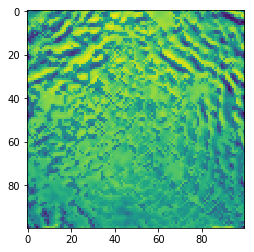

In [12]:
plt.imshow(humidity_map)

(array([  53.,   93.,  497.,  893., 1197., 1826., 1802., 1469., 1257.,
         913.]),
 array([0.22351847, 0.25755298, 0.2915875 , 0.32562201, 0.35965653,
        0.39369104, 0.42772556, 0.46176007, 0.49579459, 0.5298291 ,
        0.56386362]),
 <a list of 10 Patch objects>)

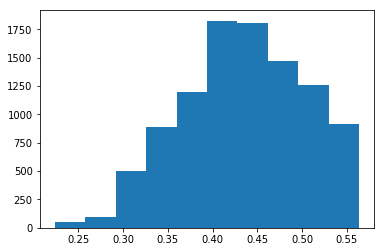

In [13]:
plt.hist(temp_map.flatten())

(array([  21.,   90.,  234.,  554., 1123., 1852., 2344., 2301., 1258.,
         223.]),
 array([0.46558544, 0.51320252, 0.5608196 , 0.60843667, 0.65605375,
        0.70367083, 0.7512879 , 0.79890498, 0.84652206, 0.89413913,
        0.94175621]),
 <a list of 10 Patch objects>)

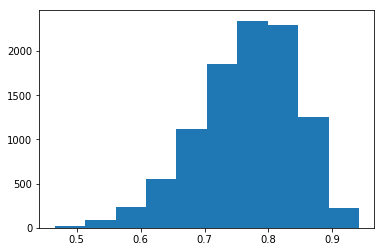

In [14]:
plt.hist(humidity_map.flatten())

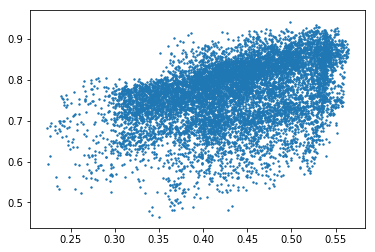

In [15]:
plt.scatter(temp_map.flatten(), humidity_map.flatten(), s=2)